

---


<center><h1>EMAIL SPAM DETECTION</center>

---



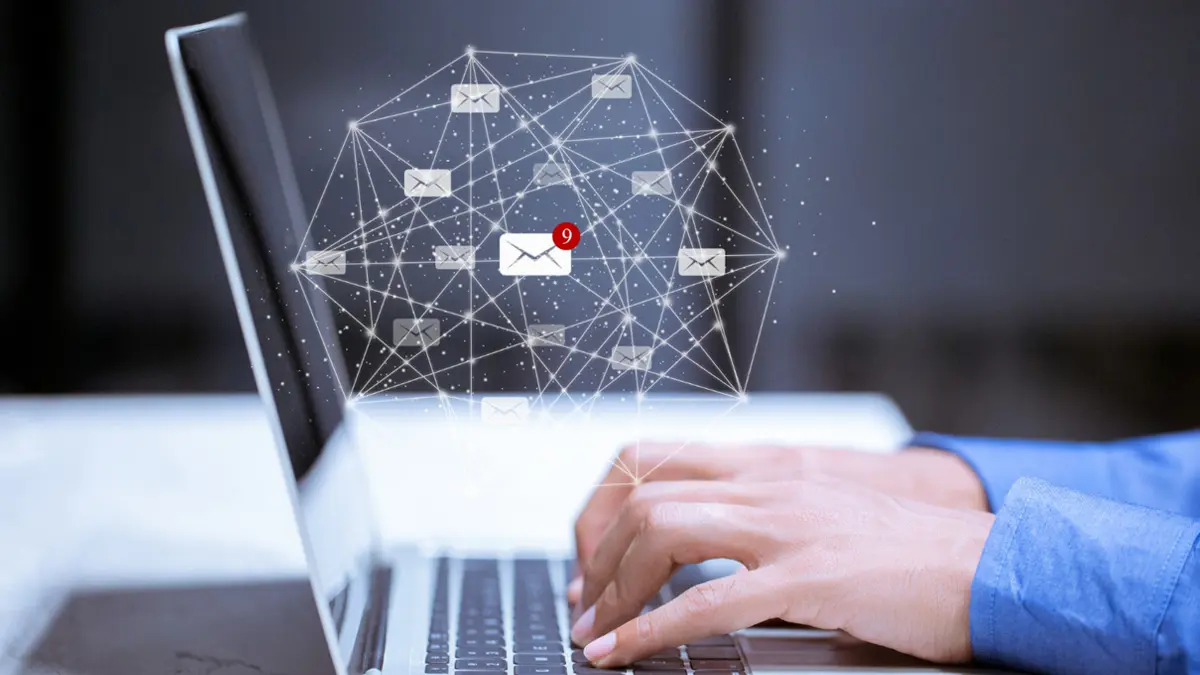

---
<a name = Section2></a>
# INTRODUCTION
---


- **Project Goal**: Build an email spam detector using Python.
- **Objective**: Train a machine learning model to classify emails as spam or non-spam.
- **Benefits**: Enhance email security, safeguard users from deceptive messages.
- **Methods**: Utilize machine learning techniques for training and classification.
- **Impact**: Protect users from falling victim to spam and phishing attacks.



---


# APPROACH


---






1.   Load the data and load all the libraries
2.   Data Preparation and Data transformation
     1. Convert all text into LowerCase
     2. Remove all special characters
     3. Remove stop words
     4. Lemmatization and Stemming
3.   Vectorization
     1. TFIDF Vectorizer
4.   Machine Learning and Deep Learning





---


# LOAD LIBRARIES AND AUDIT DATA

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#DROPPING THE UNWANTED COLUMN Unnamed:2,3 and 4

df1 = df.drop(df.columns[[2,3,4]],axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


VISUALIZATION:

---



<Axes: >

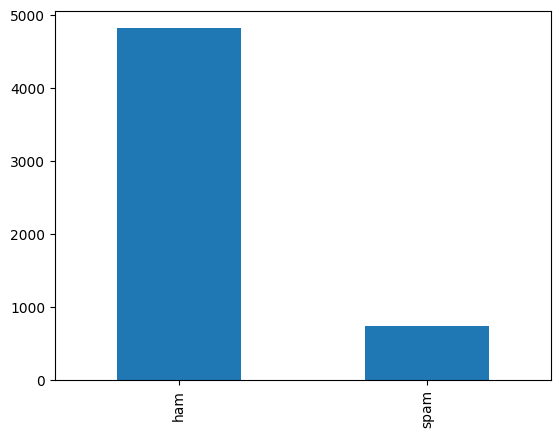

In [ ]:
df1['v1'].value_counts().plot(kind='bar')



> **INFERENCE :**


*THE GRAPH INDICATES THAT THERE IS A IMBALANCE IN THE DATA*


---



# TEXT PREPROCESSING


---



In [ ]:
# Natural Language ToolKit
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [ ]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#PREPROCESSING PROCESS

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") #Remove html tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext) #Remove after http with blanks
    rem_num = re.sub('[0-9]+', '', rem_url) #Remove numbers and send the previous url

#TOKENIZING
    tokenizer = RegexpTokenizer(r'\w+') #w for word
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')] # not in the stopwords and len of words>2
    stem_words=[stemmer.stem(w) for w in filtered_words] # Not re
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [ ]:
# VIEWING THE STOPWORDS

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# TOTAL COUNT OF STOPWORDS

print(len(stopwords.words('english')))

179


In [ ]:
df1['v2'] = df1['v2'].map(lambda s:preprocess(s)) #s is sentence

In [ ]:
# AFTER PERFORMING PREPROCESSING

df1['v2']

0       jurong point crazy available bugis great world...
1                                      lar joking wif oni
2       free entry wkly comp win cup final tkts may te...
3                           dun say early hor already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact pound prize claim easy call...
5568                                 going esplanade home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

## VECTORIZING

---



THE VECTORIZATION ITSELF CAN DO THE WHOLE PREPROCESSING WITH ITS PARAMETER.

class sklearn.feature_extraction.text.TfidfVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False

In [ ]:
# IMPORTING VECTORIZER FROM SKLEARN LIBRARY

from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()

In [ ]:
# APPLYING THT VECTORIZATION

x = vect.fit_transform(df1['v2'])

In [ ]:
x.shape

(5572, 7386)

5572 - Documents , 7386 - Tokens (in image Pixel)

In [ ]:
type(x)

scipy.sparse._csr.csr_matrix

CSR - Compressed Sparse Matrix

In [ ]:
# CONVERTING CATEGORICAL TO NUMERICAL
le = LabelEncoder()
y = le.fit_transform(df1['v1'])

# SPLITTING TRAIN AND TEST DATA



---





In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 7386)
(1115, 7386)
(4457,)
(1115,)


# BUILDING MODEL

---






TO GET THE BEST ACCURACY USING RANDOM SEARCH CV :

---



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_grid = {'criterion' :['gini','entropy','log_loss'],
                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],   #sqrt of 7386
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [ ]:
rf =  RandomForestClassifier()

In [ ]:
clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,verbose=2, random_state=123)

In [ ]:
search = clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   2.4s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=   0.7s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=   0.8s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=   0.7s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=   0.7s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=log_loss, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=   2.0s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230; total time=   0.8s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230; total time=   0.8s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230; total time=   0.7s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230; total time=   0.8s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230; total time=   0.8s
[CV] END criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=   2.1s
[CV] END criterion=e

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=   2.0s
[CV] END criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230; total time=   2.7s
[CV] END criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230; total time=   2.6s
[CV] END criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230; total time=   2.6s
[CV] END criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230; total time=   3.2s
[CV] END criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230; total time=   2.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=   0.9s
[CV] END criterion

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   3.6s


In [ ]:
search.best_params_

{'n_estimators': 130,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 90,
 'criterion': 'entropy'}

In [ ]:
search.best_score_

0.9726261116395646

## USING MACHINE LEARNING


---





NAIVE BAYES:

---



In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()

In [ ]:
nb.fit(x_train.toarray(), y_train)

nb_preds_train = nb.predict(x_train.toarray())
nb_preds_test = nb.predict(x_test.toarray())

print('Train accuracy score of the model is: ', round(accuracy_score(y_train, nb_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(y_test, nb_preds_test),2))

Train accuracy score of the model is:  0.98
Test accuracy score of the model is:  0.97


RANDOM FOREST:

---



In [ ]:
rf.fit(x_train.toarray(), y_train)

rf_preds_train = rf.predict(x_train.toarray())
rf_preds_test = rf.predict(x_test.toarray())

print('Train accuracy score of the model is: ', round(accuracy_score(y_train, rf_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(y_test, rf_preds_test),2))

Train accuracy score of the model is:  1.0
Test accuracy score of the model is:  0.98


XGB CLASSIFIER :

---



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(x_train.toarray(), y_train)

xgb_preds_train = xgb.predict(x_train.toarray())
xgb_preds_test = xgb.predict(x_test.toarray())

print('Train accuracy score of the model is: ', round(accuracy_score(y_train, xgb_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(y_test, xgb_preds_test),2))

Train accuracy score of the model is:  0.99
Test accuracy score of the model is:  0.98




> **INFERENCE** :

***Best Model :***


---



1.   XGB Classifier
2.   Naive Bayes    
3.   Random Forest  








---


# CONCLUSION

---








- Successfully developed an email spam detector using Python and machine learning techniques.
- Improved email security by accurately identifying and classifying spam mails.
- Mitigated the risks associated with deceptive messages, fraudulent schemes, and phishing attempts.
- Empowered users to trust their email communication by reducing exposure to harmful content.
- Demonstrated the practical application of machine learning in enhancing cybersecurity.
- Contributed to the ongoing efforts to create a safer online environment for all email users.